In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.anova import anova_lm


In [2]:
df = pd.read_csv("palm_ffb.csv")
print(len(df))
df.head()


130


,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


<AxesSubplot:>

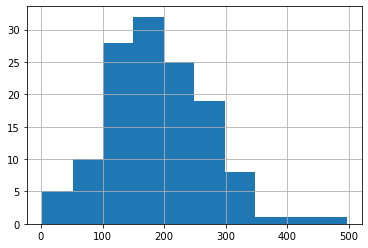

In [3]:
df["Precipitation"].hist()


<AxesSubplot:>

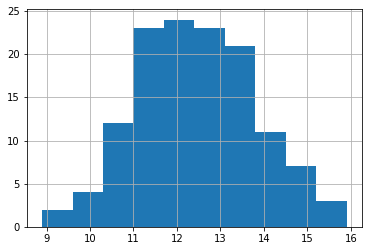

In [4]:
df["temp_diff"] = df["Max_Temp"] - df["Min_Temp"]
df["temp_diff"].hist()


In [97]:
df["temp_category"] = 0
df.loc[df["temp_diff"].argsort()[len(df) // 3 :], "temp_category"] += 1
df.loc[df["temp_diff"].argsort()[2 * len(df) // 3 :], "temp_category"] += 1

df["precipitation_category"] = 0

df.loc[df["Precipitation"].argsort()[len(df) // 3 :], "precipitation_category"] += 1
df.loc[df["Precipitation"].argsort()[2 * len(df) // 3 :], "precipitation_category"] += 1


In [5]:
precipitation_mean, precipitation_std = (
    df["Precipitation"].mean(),
    df["Precipitation"].std(),
)
temp_diff_mean, temp_diff_std = df["temp_diff"].mean(), df["temp_diff"].std()


df["temp_category"] = 0
df.loc[df["temp_diff"] > temp_diff_mean - temp_diff_std / 2, "temp_category"] += 1
df.loc[df["temp_diff"] > temp_diff_mean + temp_diff_std / 2, "temp_category"] += 1

df["precipitation_category"] = 0

df.loc[
    df["Precipitation"] > precipitation_mean - precipitation_std / 2,
    "precipitation_category",
] += 1
df.loc[
    df["Precipitation"] > precipitation_mean + precipitation_std / 2,
    "precipitation_category",
] += 1


In [6]:
model = sm.OLS.from_formula(
    "FFB_Yield ~ C(precipitation_category) + C(temp_category) + C(precipitation_category):C(temp_category)",
    data=df,
).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FFB_Yield   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     2.120
Date:                Fri, 27 May 2022   Prob (F-statistic):             0.0389
Time:                        03:40:49   Log-Likelihood:                -10.760
No. Observations:                 130   AIC:                             39.52
Df Residuals:                     121   BIC:                             65.33
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                                1.5600      0.111     14.025      0.000       1.340       1.780
C(precipitation_category)[T.1]                           0.0333      0.132      0.253      0.800      -0.227       0.294
C(precipitation_category)[T.2]                           0.1481      0.126      1.174      0.243      -0.102       0.398
C(temp_category)[T.1]                                   -0.0079      0.133     -0.059      0.953      -0.271       0.255
C(temp_category)[T.2]                                   -0.1327      0.125     -1.058      0.292      -0.381       0.116
C(precipitation_category)[T.1]:C(temp_category)[T.1]     0.0263      0.161      0.163      0.871      -0.292       0.345
C(precipitation_category)[T.2]:C(temp_category)[T.1]    -0.0862      0.169     -0.510      0.611      -0.421       0.249
C(precipitation_category)[T.1]:C(temp_category)[T.2]     0.2644      0.158      1.678      0.096      -0.047       0.576
C(precipitation_category)[T.2]:C(temp_category)[T.2]     0.1946      0.306      0.636      0.526      -0.411       0.800
==============================================================================
Omnibus:                        5.772   Durbin-Watson:                   0.588
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                3.150
Skew:                           0.143   Prob(JB):                        0.207
Kurtosis:                       2.293   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
tuned_model = model.get_robustcov_results(cov_type="HC3")
tuned_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FFB_Yield   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     9.230
Date:                Fri, 27 May 2022   Prob (F-statistic):           7.31e-10
Time:                        03:40:50   Log-Likelihood:                -10.760
No. Observations:                 130   AIC:                             39.52
Df Residuals:                     121   BIC:                             65.33
Df Model:                           8                                         
Covariance Type:                  HC3                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                                1.5600      0.141     11.080      0.000       1.281       1.839
C(precipitation_category)[T.1]                           0.0333      0.163      0.205      0.838      -0.289       0.356
C(precipitation_category)[T.2]                           0.1481      0.157      0.945      0.347      -0.162       0.458
C(temp_category)[T.1]                                   -0.0079      0.154     -0.051      0.959      -0.313       0.297
C(temp_category)[T.2]                                   -0.1327      0.150     -0.884      0.378      -0.430       0.165
C(precipitation_category)[T.1]:C(temp_category)[T.1]     0.0263      0.184      0.143      0.887      -0.338       0.391
C(precipitation_category)[T.2]:C(temp_category)[T.1]    -0.0862      0.191     -0.452      0.652      -0.464       0.292
C(precipitation_category)[T.1]:C(temp_category)[T.2]     0.2644      0.182      1.452      0.149      -0.096       0.625
C(precipitation_category)[T.2]:C(temp_category)[T.2]     0.1946      0.165      1.178      0.241      -0.132       0.522
==============================================================================
Omnibus:                        5.772   Durbin-Watson:                   0.588
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                3.150
Skew:                           0.143   Prob(JB):                        0.207
Kurtosis:                       2.293   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

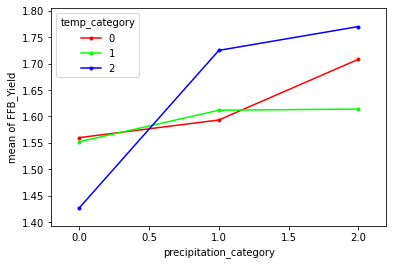

In [8]:
fig = interaction_plot(
    df["precipitation_category"], df["temp_category"], df["FFB_Yield"]
)


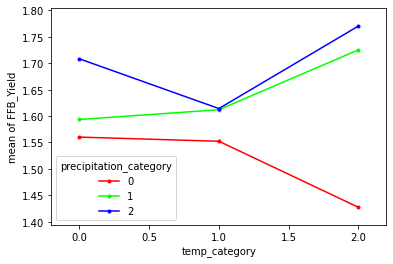

In [9]:
fig = interaction_plot(
    df["temp_category"], df["precipitation_category"], df["FFB_Yield"]
)


In [10]:
anova_lm(tuned_model, typ=2, robust="hc3")


,sum_sq,df,F,PR(>F)
C(precipitation_category),2.855763,2.0,19.236079,5.572888e-08
C(temp_category),0.112994,2.0,0.761117,4.693677e-01
C(precipitation_category):C(temp_category),0.546851,4.0,1.841761,1.251956e-01
Residual,8.981750,121.0,NaN,NaN


precipitation, pvalue = 0.004 < 0.05 => влияние фактора значимо,
остальных не значимо
